In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [28]:
# alexnet
fpath = './perceptual-distance/alexnet.csv'
df_alexnet = pd.read_csv(fpath)
alexnet_dict = df_alexnet.set_index('model').to_dict()

In [41]:
# squeezenet
fpath = './perceptual-distance/squeezenet.csv'
df_squeezenet = pd.read_csv(fpath)
squeezenet_dict = df_squeezenet.set_index('model').to_dict()

In [42]:
# vgg
fpath = './perceptual-distance/vgg.csv'
df_vgg = pd.read_csv(fpath)
vgg_dict = df_vgg.set_index('model').to_dict()

In [33]:
def plot_dset(fpath, dset_name):

    df = pd.read_csv(fpath, index_col=False)
    dset_acc = df.set_index('model').to_dict()['acc']
    
    dset_perceptual_distance_alexnet = alexnet_dict[dset_name]
    dset_perceptual_distance_squeezenet = squeezenet_dict[dset_name]
    dset_perceptual_distance_vgg = vgg_dict[dset_name]

    # AlexNet
    shared_models = dset_acc.keys() and dset_perceptual_distance_alexnet.keys()
    dict_intersection = {k: (dset_acc[k], dset_perceptual_distance_alexnet[k]) for k in shared_models}
    new_df = pd.DataFrame.from_dict(dict_intersection, orient='index')
    new_df = new_df.reset_index(level=0)
    new_df.columns = ['model', 'few_shot', 'perceptual_distance']

    sns.set_style("darkgrid")
    markers=['x', 'D', 's', '<', '>', 'v', 'X', '+', 'P', '4', 'p', '|']
    g = sns.lmplot(x="perceptual_distance", y="few_shot", hue="model", data=new_df, fit_reg=False, markers=markers, palette="tab10", scatter_kws={"s": 150})
    sns.regplot(x="perceptual_distance", y="few_shot", data=new_df, scatter=False, ax=g.axes[0, 0])
    plt.xlabel("Perceptual Distance (AlexNet)")
    plt.ylabel("Few-shot Accuracy")
    plt.title(dset_name)
    plt.show()


    # VGG
    shared_models = dset_acc.keys() and dset_perceptual_distance_vgg.keys()
    dict_intersection = {k: (dset_acc[k], dset_perceptual_distance_vgg[k]) for k in shared_models}
    new_df = pd.DataFrame.from_dict(dict_intersection, orient='index')
    new_df = new_df.reset_index(level=0)
    new_df.columns = ['model', 'few_shot', 'perceptual_distance']

    sns.set_style("darkgrid")
    markers=['x', 'D', 's', '<', '>', 'v', 'X', '+', 'P', '4', 'p', '|']
    g = sns.lmplot(x="perceptual_distance", y="few_shot", hue="model", data=new_df, fit_reg=False, markers=markers, palette="tab10", scatter_kws={"s": 150})
    sns.regplot(x="perceptual_distance", y="few_shot", data=new_df, scatter=False, ax=g.axes[0, 0])
    plt.xlabel("Perceptual Distance (VGG)")
    plt.ylabel("Few-shot Accuracy")
    plt.title(dset_name)
    plt.show()


    # SqueezeNet
    shared_models = dset_acc.keys() and dset_perceptual_distance_squeezenet.keys()
    dict_intersection = {k: (dset_acc[k], dset_perceptual_distance_squeezenet[k]) for k in shared_models}
    new_df = pd.DataFrame.from_dict(dict_intersection, orient='index')
    new_df = new_df.reset_index(level=0)
    new_df.columns = ['model', 'few_shot', 'perceptual_distance']

    sns.set_style("darkgrid")
    markers=['x', 'D', 's', '<', '>', 'v', 'X', '+', 'P', '4', 'p', '|']
    g = sns.lmplot(x="perceptual_distance", y="few_shot", hue="model", data=new_df, fit_reg=False, markers=markers, palette="tab10", scatter_kws={"s": 150})
    sns.regplot(x="perceptual_distance", y="few_shot", data=new_df, scatter=False, ax=g.axes[0, 0])
    plt.xlabel("Perceptual Distance (SqueezeNet)")
    plt.ylabel("Few-shot Accuracy")
    plt.title(dset_name)
    plt.show()
    

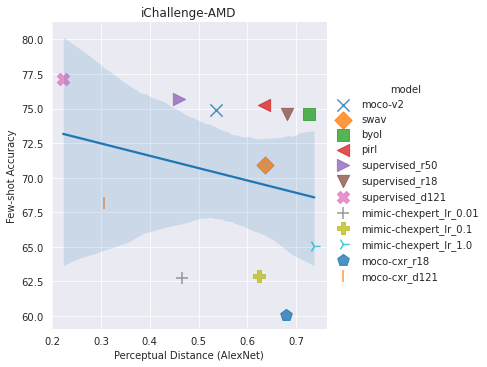

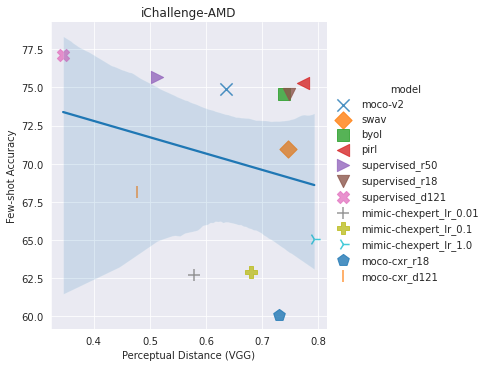

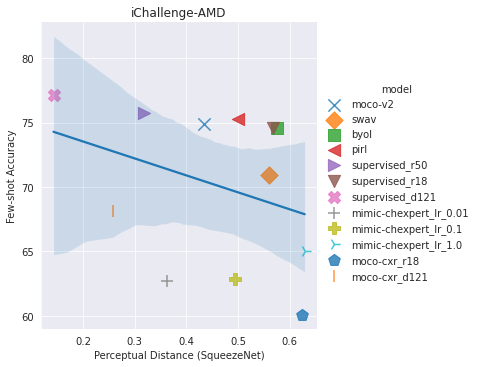

In [36]:
plot_dset('./few-shot/ichallenge_amd.csv', 'iChallenge-AMD')

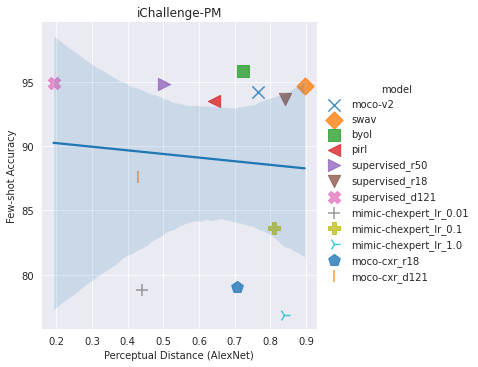

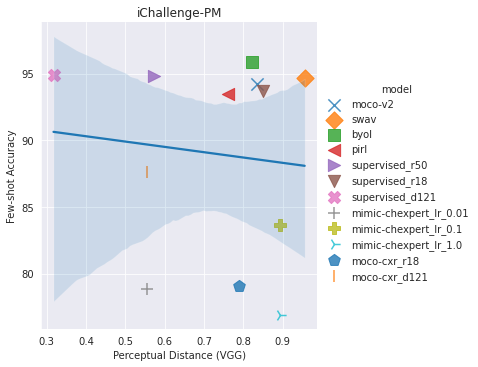

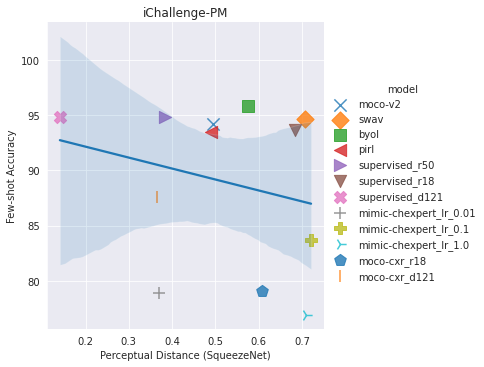

In [37]:
plot_dset('./few-shot/ichallenge_pm.csv', 'iChallenge-PM')

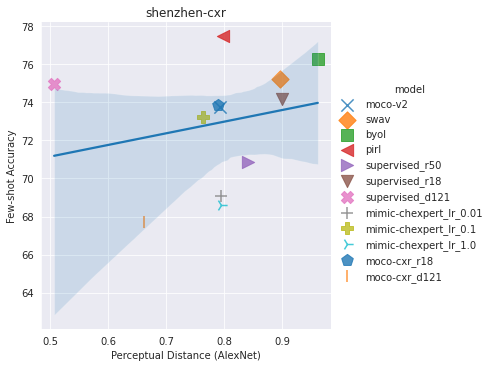

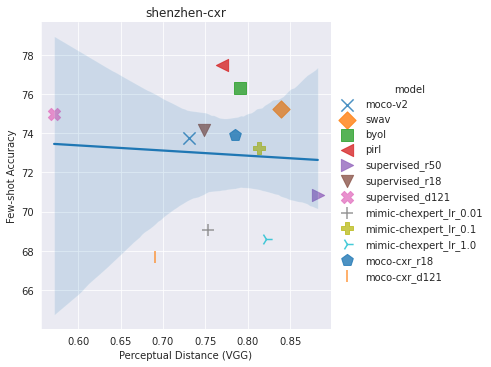

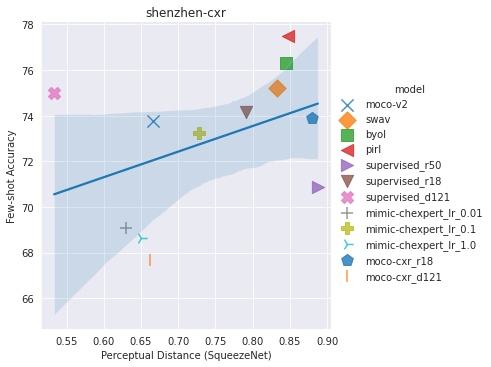

In [38]:
plot_dset('./few-shot/shenzhencxr.csv', 'shenzhen-cxr')

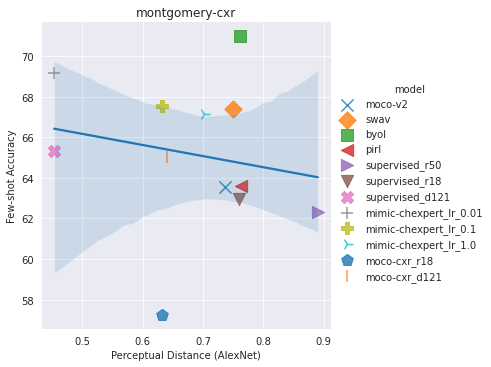

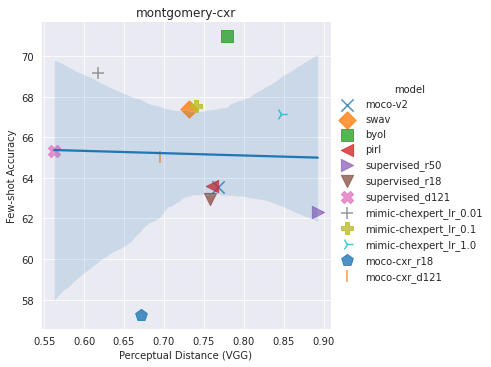

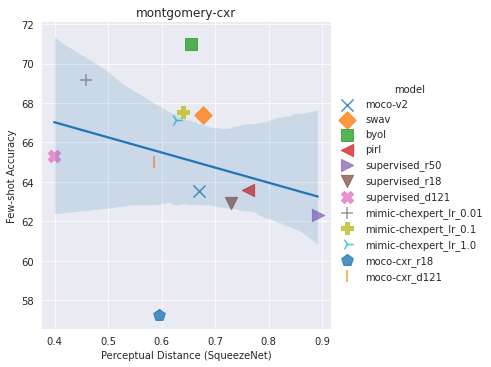

In [39]:
plot_dset('./few-shot/montgomerycxr.csv', 'montgomery-cxr')

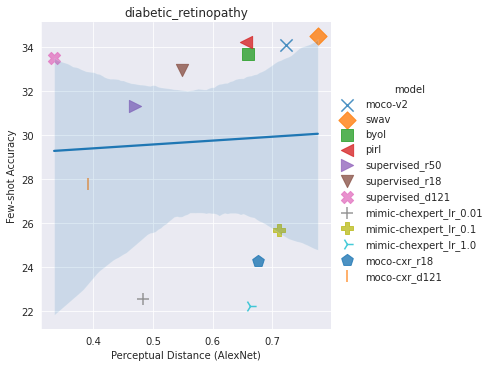

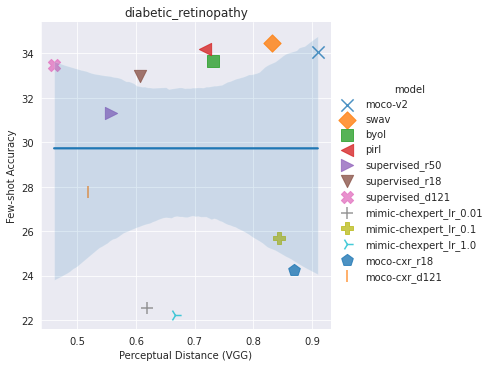

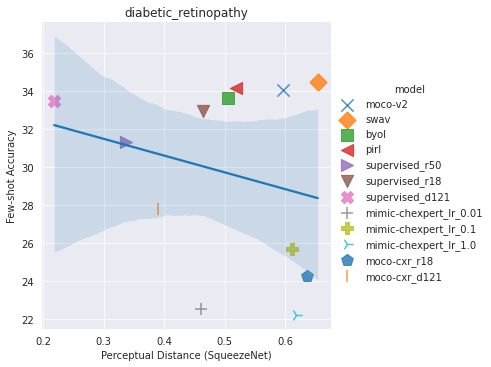

In [43]:
plot_dset('./few-shot/diabetic_retinopathy.csv', 'diabetic_retinopathy')

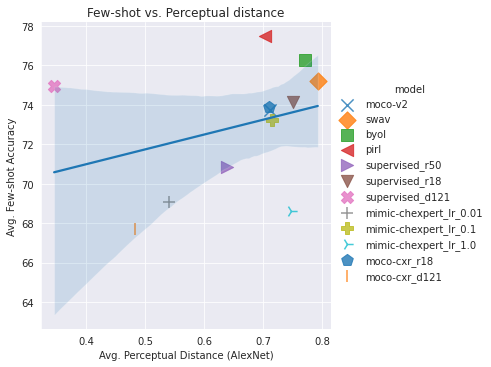

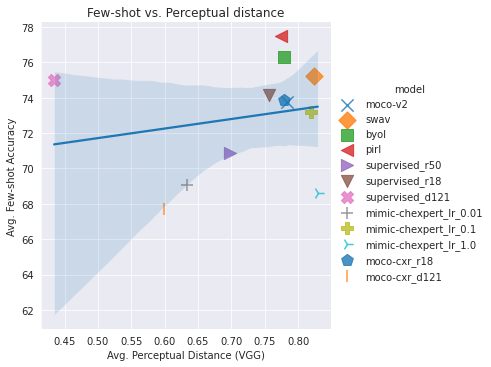

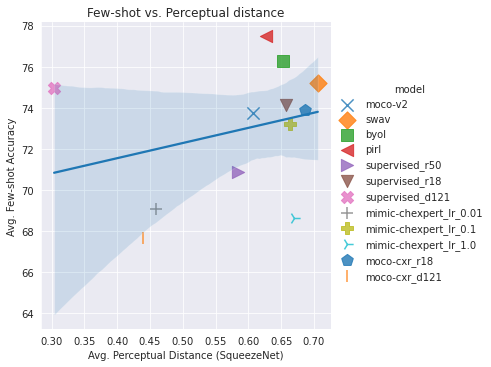

In [60]:
# plot average across all datasets
dsets = [('diabetic_retinopathy', 'diabetic_retinopathy'), ('ichallenge_amd', 'iChallenge-AMD'),
 ('ichallenge_pm', 'iChallenge-PM') , ('montgomerycxr', 'montgomery-cxr'), ('shenzhencxr', 'shenzhen-cxr')]

average_acc = {}
for i, (dset_name, dset_title) in enumerate(dsets):

    fpath = f'./few-shot/{dset_name}.csv'
    df = pd.read_csv(fpath, index_col=False)
    dset_acc = df.set_index('model').to_dict()['acc']
    for model, acc in dset_acc.items():
        average_acc.setdefault(model, []).append(acc)

for model in average_acc.keys():
    average_acc[model] = np.mean(average_acc[model])



# AlexNet
avg_perceptual_distance_alexnet = {}
for dset, accs in alexnet_dict.items():
    for model, acc in accs.items():
        avg_perceptual_distance_alexnet.setdefault(model, []).append(acc)
for model in avg_perceptual_distance_alexnet.keys():
    avg_perceptual_distance_alexnet[model] = np.mean(avg_perceptual_distance_alexnet[model])


shared_models = dset_acc.keys() and avg_perceptual_distance_alexnet.keys()
dict_intersection = {k: (dset_acc[k], avg_perceptual_distance_alexnet[k]) for k in shared_models}
new_df = pd.DataFrame.from_dict(dict_intersection, orient='index')
new_df = new_df.reset_index(level=0)
new_df.columns = ['model', 'few_shot', 'perceptual_distance']

sns.set_style("darkgrid")
markers=['x', 'D', 's', '<', '>', 'v', 'X', '+', 'P', '4', 'p', '|']
g = sns.lmplot(x="perceptual_distance", y="few_shot", hue="model", data=new_df, fit_reg=False, markers=markers, palette="tab10", scatter_kws={"s": 150})
sns.regplot(x="perceptual_distance", y="few_shot", data=new_df, scatter=False, ax=g.axes[0, 0])
plt.xlabel("Avg. Perceptual Distance (AlexNet)")
plt.ylabel("Avg. Few-shot Accuracy")
plt.title("Few-shot vs. Perceptual distance")
plt.show()




# VGG
avg_perceptual_distance_vgg = {}
for dset, accs in vgg_dict.items():
    for model, acc in accs.items():
        avg_perceptual_distance_vgg.setdefault(model, []).append(acc)
for model in avg_perceptual_distance_vgg.keys():
    avg_perceptual_distance_vgg[model] = np.mean(avg_perceptual_distance_vgg[model])


shared_models = dset_acc.keys() and avg_perceptual_distance_vgg.keys()
dict_intersection = {k: (dset_acc[k], avg_perceptual_distance_vgg[k]) for k in shared_models}
new_df = pd.DataFrame.from_dict(dict_intersection, orient='index')
new_df = new_df.reset_index(level=0)
new_df.columns = ['model', 'few_shot', 'perceptual_distance']

sns.set_style("darkgrid")
markers=['x', 'D', 's', '<', '>', 'v', 'X', '+', 'P', '4', 'p', '|']
g = sns.lmplot(x="perceptual_distance", y="few_shot", hue="model", data=new_df, fit_reg=False, markers=markers, palette="tab10", scatter_kws={"s": 150})
sns.regplot(x="perceptual_distance", y="few_shot", data=new_df, scatter=False, ax=g.axes[0, 0])
plt.xlabel("Avg. Perceptual Distance (VGG)")
plt.ylabel("Avg. Few-shot Accuracy")
plt.title("Few-shot vs. Perceptual distance")
plt.show()




# SqueezeNet
avg_perceptual_distance_squeezenet = {}
for dset, accs in squeezenet_dict.items():
    for model, acc in accs.items():
        avg_perceptual_distance_squeezenet.setdefault(model, []).append(acc)
for model in avg_perceptual_distance_squeezenet.keys():
    avg_perceptual_distance_squeezenet[model] = np.mean(avg_perceptual_distance_squeezenet[model])


shared_models = dset_acc.keys() and avg_perceptual_distance_squeezenet.keys()
dict_intersection = {k: (dset_acc[k], avg_perceptual_distance_squeezenet[k]) for k in shared_models}
new_df = pd.DataFrame.from_dict(dict_intersection, orient='index')
new_df = new_df.reset_index(level=0)
new_df.columns = ['model', 'few_shot', 'perceptual_distance']

sns.set_style("darkgrid")
markers=['x', 'D', 's', '<', '>', 'v', 'X', '+', 'P', '4', 'p', '|']
g = sns.lmplot(x="perceptual_distance", y="few_shot", hue="model", data=new_df, fit_reg=False, markers=markers, palette="tab10", scatter_kws={"s": 150})
sns.regplot(x="perceptual_distance", y="few_shot", data=new_df, scatter=False, ax=g.axes[0, 0])
plt.xlabel("Avg. Perceptual Distance (SqueezeNet)")
plt.ylabel("Avg. Few-shot Accuracy")
plt.title("Few-shot vs. Perceptual distance")
plt.show()



